## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


## Storing in an array all values and preprocessing

In [3]:
dataset_df6 = pd.read_csv(r"./postmonsoon/ground_water_quality_2018_post.csv")
dataset_df7 = pd.read_csv(r"./postmonsoon/ground_water_quality_2019_post.csv")
dataset_df8 = pd.read_csv(r"./postmonsoon/ground_water_quality_2020_post.csv")
dataset_df9 = pd.read_csv(r"./postmonsoon/ground_water_quality_2021_post.csv")
dataset_df = pd.concat([dataset_df6,dataset_df7,dataset_df8,dataset_df9],join='outer',ignore_index=True)
dataset_df.drop(columns=['RL_GIS','sno','village','mandal','district','season'],inplace=True)
#dataset_df['season']=dataset_df['season'].astype(str).apply(lambda x: 0 if 'pre' in x.lower() else 1)

In [4]:
dataset_df['pH'] = pd.to_numeric(dataset_df['pH'], errors='coerce')

# Now convert to float
dataset_df['pH'] = dataset_df['pH'].astype(float)
dataset_df['RSC  meq  / L'] = pd.to_numeric(dataset_df['RSC  meq  / L'], errors='coerce')

# Now convert to float
dataset_df['RSC  meq  / L'] = dataset_df['RSC  meq  / L'].astype(float)


In [5]:
#To remove rows containing null values
for index, row in dataset_df.iterrows():
    if 'NA' in row.values:
        dataset_df.drop(index, inplace=True)
    elif(row['Classification']=='OG')or(row['Classification']=='O.G')or(row['Classification']=='BELOW THE GRAPH')or(row['Classification']=='OUT OF SAR GRAPH')or(row['Classification']=='BG'):
        dataset_df.drop(index, inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [6]:
null_threshold = len(dataset_df) * 0.25
for column in dataset_df.columns:
    null_count = dataset_df[column].isnull().sum()
    if null_count > null_threshold:
        dataset_df.drop(column, axis=1, inplace=True)
    elif null_count > 0:
        dataset_df.dropna(subset=[column], inplace=True)
dataset_df.reset_index(drop=True, inplace=True)

In [7]:
dataset_df.columns

Index(['lat_gis', 'long_gis', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F',
       'NO3 ', 'SO4', 'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification',
       'RSC  meq  / L', 'Classification.1'],
      dtype='object')

In [8]:
dataset_df.describe()

,lat_gis,long_gis,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,RSC meq / L
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000
mean,48.453599,47.951256,7.767005,1237.392632,791.926000,4.081071,272.147993,171.384211,1.009494,63.780039,52.098263,117.049666,8.984668,70.922105,46.596948,370.437992,2.749684,-1.883941
std,30.712205,30.602584,0.471427,780.240512,499.361537,13.252392,132.542961,175.960854,0.830707,83.327053,70.984858,102.696470,25.299169,57.510218,35.612862,236.452278,2.548896,4.298570
min,0.000000,0.000000,6.160000,115.000000,74.000000,0.000000,10.000000,10.000000,0.010000,0.000000,1.000000,2.000000,0.000000,8.000000,0.100000,39.991776,0.140000,-59.584539
25%,17.696345,17.680000,7.420000,731.750000,468.000000,0.000000,173.290362,60.000000,0.490000,13.488318,16.000000,52.000000,2.000000,32.000000,24.000000,220.000000,1.378755,-3.198561
50%,77.455000,19.590000,7.800000,1049.500000,671.500000,0.000000,257.224388,120.000000,0.820000,38.927205,29.000000,88.256151,3.100000,56.000000,38.896000,319.962993,2.097923,-1.197780
75%,78.920000,78.620555,8.130000,1520.750000,973.350000,0.000000,350.000000,220.000000,1.260000,79.069775,57.000000,145.050000,6.607500,88.000000,58.344000,459.917763,3.236586,0.000822
max,81.180000,80.920000,10.440000,9499.000000,6079.360000,100.000000,1240.000000,2480.000000,13.700000,1028.000000,860.000000,1154.000000,354.600000,640.000000,457.028000,3479.226974,31.435063,18.200822


In [9]:
dataset_df.shape

(1900, 20)

In [10]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   lat_gis           1900 non-null   float64
 1   long_gis          1900 non-null   float64
 2   pH                1900 non-null   float64
 3   E.C               1900 non-null   float64
 4   TDS               1900 non-null   float64
 5   CO3               1900 non-null   float64
 6   HCO3              1900 non-null   float64
 7   Cl                1900 non-null   float64
 8   F                 1900 non-null   float64
 9   NO3               1900 non-null   float64
 10  SO4               1900 non-null   float64
 11  Na                1900 non-null   float64
 12  K                 1900 non-null   float64
 13  Ca                1900 non-null   float64
 14  Mg                1900 non-null   float64
 15  T.H               1900 non-null   float64
 16  SAR               1900 non-null   float64


In [11]:
all_labels=dataset_df['Classification'].unique()
for label in all_labels:
    print(label)

C2S1
C3S1
C4S2
C4S1
C3S2
C4S4
C4S3
C1S1
C3S4
C3S3
C2S2


In [12]:
print(len(dataset_df[dataset_df['Classification']=='OG']),len(dataset_df[dataset_df['Classification']=='O.G']),len(dataset_df[dataset_df['Classification']=='BELOW THE GRAPH']),len(dataset_df[dataset_df['Classification']=='OUT OF SAR GRAPH']),len(dataset_df[dataset_df['Classification']=='BG']))

0 0 0 0 0


In [13]:
#encoding/labelling the target column
label_mapping = {
    label: index for index, label in enumerate(dataset_df['Classification'].unique())
}
# Map labels to numerical values
dataset_df['Classification'] = dataset_df['Classification'].map(label_mapping)
dataset_df['Classification'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
label_mapping

{'C2S1': 0,
 'C3S1': 1,
 'C4S2': 2,
 'C4S1': 3,
 'C3S2': 4,
 'C4S4': 5,
 'C4S3': 6,
 'C1S1': 7,
 'C3S4': 8,
 'C3S3': 9,
 'C2S2': 10}

In [15]:
#standardisation of the data
means = dataset_df.drop(columns=['Classification','Classification.1']).mean()
stds = dataset_df.drop(columns=['Classification','Classification.1']).std()
for col in dataset_df.columns:
    if col != 'Classification' and col != 'Classification.1':  # Exclude target column from standardization
        dataset_df[col] = (dataset_df[col] - means[col]) / stds[col]

In [16]:
# randomising the dataframe and splitting to get train and test dataframes
dataset_df = dataset_df.sample(frac=1, random_state=42)
num_rows = len(dataset_df)
train_size = int(0.8 * num_rows)
test_size = num_rows - train_size
# Split the DataFrame into training and testing sets
train_dataset_df = dataset_df.head(train_size)
test_dataset_df = dataset_df.tail(test_size)

## Implementation of softmax regression

![image.png](softmaxExplanation.png)

The softmax regression predicts probability of any instance to belong to one of the class using softmax function. Here z1,z2,..,zc denote linear combination of input features. (c is number of classes here). Here gradient descent would be used to find the weights( which are used to calculate zi's and ultimately the probabilities).

In [17]:
X_train = train_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_train = train_dataset_df['Classification'].values
X_test = test_dataset_df.drop(columns=['Classification','Classification.1'], axis=1).values
y_test = test_dataset_df['Classification'].values
print("The shape of training data is (it is a dataframe):",X_train.shape)
num_of_features=X_train.shape[1]
num_of_classes=len(label_mapping)

The shape of training data is (it is a dataframe): (1520, 18)


In [18]:
class SoftmaxRegression:
    #Learning rate is preset to 0.01 and number of epochs is set to 1000
    def __init__(self, num_of_features, num_of_classes, learning_rate=0.01, num_epochs=1000):
        self.num_of_features = num_of_features
        self.num_of_classes = num_of_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.W = np.zeros((num_of_features, num_of_classes))#initially all weights and biases are set to 0
        self.b = np.zeros(num_of_classes)
        self.loss_history = []

    def softmax(self, z):#softmax function, z is matrix, where each row corresponds to a sample and each column is a class
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))#subtracted the maximum value in each row to help prevent overflow and maintain numerical stability in exponentiation
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def one_hot_encode(self, y):#y is labels of input ,vector
        one_hot_y = np.zeros((len(y), self.num_of_classes))
        for i in range(len(y)):
            one_hot_y[i, y[i]] = 1#for each row, column corresponding to that sample is set to one and others to 0
        return one_hot_y

    #forward and backward propogation
    def fit(self, X, y):
        y_one_hot = self.one_hot_encode(y)
        #training loop
        for epoch in range(self.num_epochs):
            #forward propogation, 
            z = np.dot(X, self.W) + self.b#result z is also a matrix
            y_pred = self.softmax(z)#result is a matrix
            loss = self.cross_entropy_loss(y_one_hot, y_pred)#loss function used is cross entropy loss
            self.loss_history.append(loss)
            dz = y_pred - y_one_hot#update
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0)
            #backward propogation
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
            if (epoch+1) % 100 == 0:
                print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {loss:.4f}")
        self.plot_loss()
        
    #loss over epochs
    def plot_loss(self):
        plt.plot(range(1, self.num_epochs + 1), self.loss_history, label='Training Loss')
        plt.title('Training Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid zeros
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))#cross entropy function is used here


    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        y_pred = self.softmax(z)#softmax function gives predictions in each class for each sample
        return np.argmax(y_pred, axis=1)#choose that class with largest probability for each class
    
    def evaluate(self, X, y,print_confusion_matrix=False):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        
        # Calculate precision, recall, and F1-score
        tp = np.sum((y_pred == y) & (y_pred == 1))#true positives
        fp = np.sum((y_pred != y) & (y_pred == 1))#false positives
        fn = np.sum((y_pred != y) & (y_pred == 0))#false negatives
        if (tp + fp != 0):
            precision = tp / (tp + fp)  
        else:
            precision = 0
        if (tp + fn != 0):
            recall = tp / (tp + fn) 
        else :
            recall=0
        if (precision+recall !=0):
            f1_score = 2 * precision * recall / (precision + recall)
        else :
            f1_score=0
        print(f"Precision:{precision:.4f}")
        print(f"Recall:{precision:.4f}")
        print(f"Accuracy:{precision:.4f}")
        print(f"F1_Score:{f1_score:.4f}")
        if print_confusion_matrix:
            confusion = confusion_matrix(y, y_pred)
            self.plot_confusion_matrix(confusion)
    def plot_confusion_matrix(self, confusion_matrix):
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
        plt.title("Confusion Matrix")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

## Fitting the model/training

Epoch 100/1000, Loss: 0.7227
Epoch 200/1000, Loss: 0.2083
Epoch 300/1000, Loss: 0.8085
Epoch 400/1000, Loss: 0.6744
Epoch 500/1000, Loss: 0.6902
Epoch 600/1000, Loss: 0.3711
Epoch 700/1000, Loss: 0.3390
Epoch 800/1000, Loss: 0.7396
Epoch 900/1000, Loss: 0.3567
Epoch 1000/1000, Loss: 0.7436


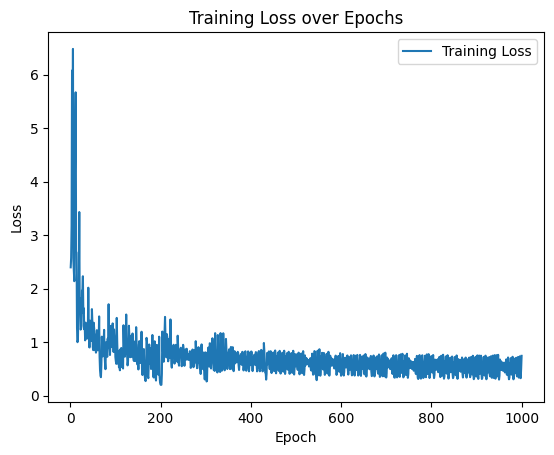

In [19]:
softmax_model = SoftmaxRegression(num_of_features, num_of_classes)
softmax_model.fit(X_train, y_train)

## Evaluating the model

Precision:0.9414
Recall:0.9414
Accuracy:0.9414
F1_Score:0.9494


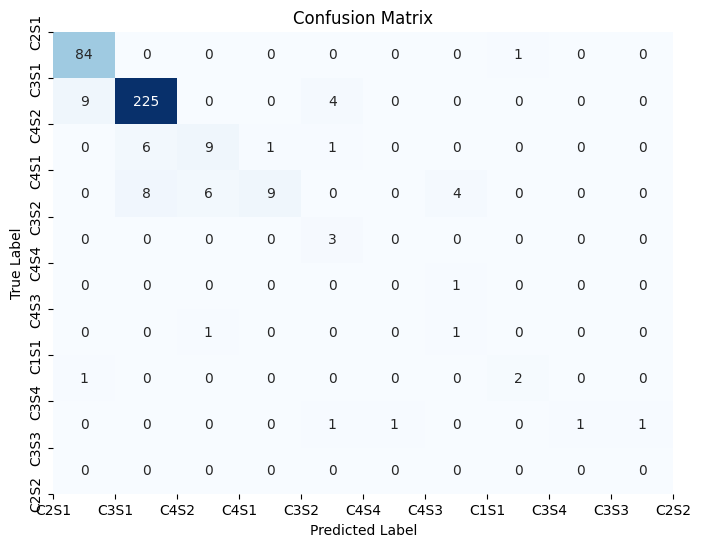

In [20]:
softmax_model.evaluate(X_test,y_test,True)

Precision:0.9588
Recall:0.9588
Accuracy:0.9588
F1_Score:0.9668


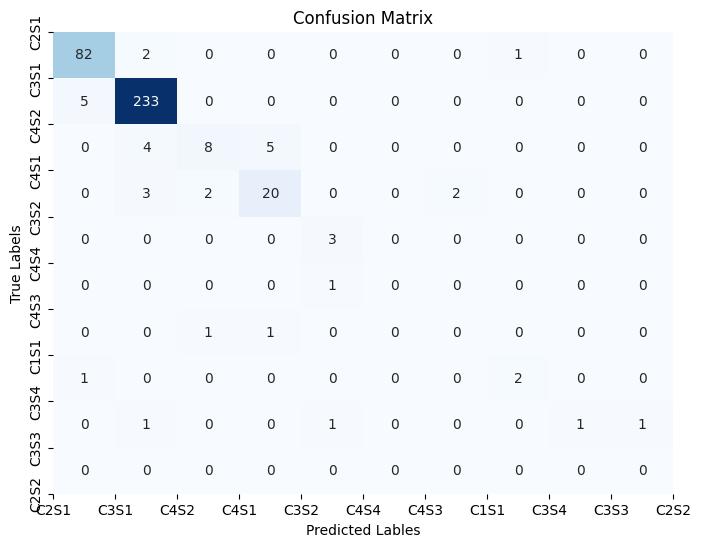

In [21]:
# with using scikit learns function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Train softmax regression model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_reg.fit(X_train, y_train)
# Predict on the test set
y_pred = softmax_reg.predict(X_test)
# Calculate accuracy,precision, recall,f1score
accuracy = np.mean(y_pred == y_test)
# Calculate precision, recall, and F1-score
tp = np.sum((y_pred == y_test) & (y_pred == 1))#true positives
fp = np.sum((y_pred != y_test) & (y_pred == 1))#false positives
fn = np.sum((y_pred != y_test) & (y_pred == 0))#false negatives
if (tp + fp != 0):
    precision = tp / (tp + fp)  
else:
    precision = 0
if (tp + fn != 0):
    recall = tp / (tp + fn) 
else :
    recall=0
if (precision+recall !=0):
    f1_score = 2 * precision * recall / (precision + recall)
else :
    f1_score=0
print(f"Precision:{precision:.4f}")
print(f"Recall:{precision:.4f}")
print(f"Accuracy:{precision:.4f}")
print(f"F1_Score:{f1_score:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.yticks(ticks=range(len(label_mapping)), labels=label_mapping.keys())
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()